**Noopur Gupta**

Data Sprint #19: Classification of Microorganisms of Sukhna and Dhanas Lakes

In [25]:


import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipultion tool
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
# import mean squared error from sklearn.metric
from sklearn.metrics import f1_score
#Decisoin Tree classifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier



train_mo_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/sukhna_dhanas/train_set_label.csv" )

Perform EDA and Data Visualization 👀 to understand the data. Learn more about EDA here. Learn more about data visualization here
Clean the data if required (like removing or filling missing values, treat outliers, etc.). Learn more about handling missing values here
Perform Data Preprocessing if you feel it's required. Learn one hot encoding here.

In [26]:
train_mo_data.head()


,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
0,0.711636,0.673498,0.109069,0.870544,0.010808,0.660599,0.094353,0.987915,0.870476,0.447276,0.029022,0.058923,0.875395,0.875395,0.877460,0.871746,0.025669,0.028256,0.010776,0.001776,0.878873,0.453973,0.020195,1
1,0.184271,0.865533,0.181675,0.306442,0.021235,0.183804,0.484926,0.974488,0.284444,0.345343,0.148896,0.115320,0.304870,0.304870,0.295238,0.290794,0.128062,0.077815,0.044747,0.016309,0.325508,0.360384,0.045702,2
2,0.431175,0.679469,0.172644,0.750469,0.020929,0.380940,0.891717,0.946626,0.707302,0.227592,0.066246,0.109428,0.728653,0.728653,0.729524,0.723810,0.065495,0.062696,0.049242,0.006400,0.739531,0.255860,0.042004,2
3,0.712849,0.991839,0.240241,0.271420,0.036976,0.700643,0.016835,0.975159,0.268571,0.468366,0.023344,0.249158,0.270715,0.270715,0.269841,0.268571,0.146561,0.020286,0.035455,0.006678,0.267614,0.568813,0.073303,4
4,0.338077,0.996782,0.123578,0.045654,0.011389,0.088682,0.219150,0.982544,0.041905,0.630931,0.100946,0.187710,0.041746,0.041746,0.041905,0.041905,0.134704,0.011038,0.034491,0.004833,0.071762,0.699979,0.024521,2


In [27]:
train_mo_data.info()
print("train_mo_data.shape",train_mo_data.shape)
print("null",train_mo_data.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13824 entries, 0 to 13823
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         13824 non-null  float64
 1   Eccentricity     13824 non-null  float64
 2   EquivDiameter    13824 non-null  float64
 3   Extrema          13824 non-null  float64
 4   FilledArea       13824 non-null  float64
 5   Extent           13824 non-null  float64
 6   Orientation      13824 non-null  float64
 7   EulerNumber      13824 non-null  float64
 8   BoundingBox1     13824 non-null  float64
 9   BoundingBox2     13824 non-null  float64
 10  BoundingBox3     13824 non-null  float64
 11  BoundingBox4     13824 non-null  float64
 12  ConvexHull1      13824 non-null  float64
 13  ConvexHull2      13824 non-null  float64
 14  ConvexHull3      13824 non-null  float64
 15  ConvexHull4      13824 non-null  float64
 16  MajorAxisLength  13824 non-null  float64
 17  MinorAxisLen

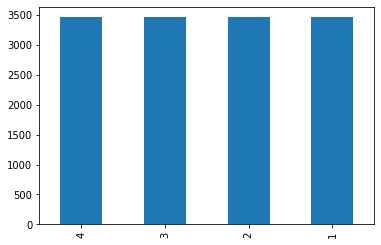

In [28]:
train_mo_data['microorganism'].value_counts()
train_mo_data['microorganism'].value_counts().plot(kind='bar')

In [29]:
#copy the Dataset
train_df2 = train_mo_data.copy()
train_df2.drop('microorganism',axis=1,inplace=True)
train_df2.head()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area
0,0.711636,0.673498,0.109069,0.870544,0.010808,0.660599,0.094353,0.987915,0.870476,0.447276,0.029022,0.058923,0.875395,0.875395,0.877460,0.871746,0.025669,0.028256,0.010776,0.001776,0.878873,0.453973,0.020195
1,0.184271,0.865533,0.181675,0.306442,0.021235,0.183804,0.484926,0.974488,0.284444,0.345343,0.148896,0.115320,0.304870,0.304870,0.295238,0.290794,0.128062,0.077815,0.044747,0.016309,0.325508,0.360384,0.045702
2,0.431175,0.679469,0.172644,0.750469,0.020929,0.380940,0.891717,0.946626,0.707302,0.227592,0.066246,0.109428,0.728653,0.728653,0.729524,0.723810,0.065495,0.062696,0.049242,0.006400,0.739531,0.255860,0.042004
3,0.712849,0.991839,0.240241,0.271420,0.036976,0.700643,0.016835,0.975159,0.268571,0.468366,0.023344,0.249158,0.270715,0.270715,0.269841,0.268571,0.146561,0.020286,0.035455,0.006678,0.267614,0.568813,0.073303
4,0.338077,0.996782,0.123578,0.045654,0.011389,0.088682,0.219150,0.982544,0.041905,0.630931,0.100946,0.187710,0.041746,0.041746,0.041905,0.041905,0.134704,0.011038,0.034491,0.004833,0.071762,0.699979,0.024521


**Droping of Feature with Missing Values**

In [31]:
X=train_mo_data.drop(['microorganism'],axis=1)
# X= train_insur_data.drop('Claim',axis=1)
X.head()
y = train_mo_data.microorganism

# #TestData
test_mo_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/sukhna_dhanas/test_set_label.csv')

                                                   

In [ ]:
# ColumnsToLabelEncode=['Agency','Agency Type','Distribution Channel','Product Name','Destination']
# train_df2=MultiColumnLabelEncoder(ColumnsToLabelEncode).fit_transform(train_df2)

***Prepare Dataset for Training ***
1. Convert categorical columns into one hot encoded columns using get_dummies.

2. Split the dataset stratified on the classes so that our training and validation data contains same distribution of both classes.

In [33]:
# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,stratify=y,shuffle=True,
                                                                random_state=0)
X_test_full = test_mo_data


# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 15 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)



In [34]:
X_all=pd.concat([X_train,X_valid,X_test])
X_all.shape

(17280, 23)

**Splitting the data into Train and Validation Set**

We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.


In [35]:
X_all.head()


,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area
5628,0.684153,0.880362,0.124980,0.497186,0.013603,0.458140,0.630011,0.994293,0.459683,0.536907,0.066877,0.050505,0.459836,0.459836,0.460317,0.459683,0.039350,0.023884,0.013392,0.002316,0.473021,0.531799,0.024959
2064,0.743983,0.960987,0.231110,0.192225,0.034965,0.353746,0.211388,0.972328,0.180188,0.217957,0.091121,0.147008,0.189624,0.189624,0.185494,0.182659,0.103792,0.029374,0.031669,0.006102,0.212597,0.267931,0.069306
3341,0.397985,0.913912,0.074655,0.795497,0.005517,0.283304,0.609244,0.986908,0.777778,0.640598,0.066246,0.038721,0.775459,0.775459,0.777778,0.778095,0.036420,0.018359,0.023729,0.001934,0.799996,0.631090,0.011473
2791,0.682552,0.658632,0.151280,0.896811,0.018264,0.666659,0.929813,0.974152,0.867302,0.427944,0.039117,0.077441,0.864643,0.864643,0.867302,0.867302,0.033468,0.035855,0.020521,0.003180,0.881471,0.445046,0.033851
2409,0.168408,0.981720,0.219246,0.949969,0.031751,0.050051,0.689358,0.931521,0.673651,0.549209,0.281388,0.293771,0.676154,0.676154,0.673651,0.685079,0.255642,0.056345,0.104026,0.024249,0.796577,0.725174,0.062688


In [36]:
X=X_all[:train_df2.shape[0]]
X_test=X_all[train_df2.shape[0]:]
X.shape, X_test.shape

((13824, 23), (3456, 23))

In [37]:
y=pd.concat([y_train,y_valid])
y.shape

(13824,)

In [ ]:
# X = X_all.shape[0]

In [38]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y), y.values)
baseline = RandomForestClassifier(class_weight='balanced',random_state=42)
baseline.fit(X,y)
preds = baseline.predict(X)
print(classification_report(y,preds))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3456
           2       1.00      1.00      1.00      3456
           3       1.00      1.00      1.00      3456
           4       1.00      1.00      1.00      3456

    accuracy                           1.00     13824
   macro avg       1.00      1.00      1.00     13824
weighted avg       1.00      1.00      1.00     13824



In [39]:
preds = baseline.predict(X_test)

In [40]:
preds.shape

(3456,)

In [41]:
preds[0]

3

In [42]:
res = pd.DataFrame(preds)
res.columns = ['prediction']

from google.colab import files
res.to_csv("submission_baseline.csv",index=False)
files.download("submission_baseline.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
res['prediction'].value_counts()

2    870
3    866
4    864
1    856
Name: prediction, dtype: int64